In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-dropout/student_dropout.csv


In [3]:
# import the required libs 
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
print("loading the dataset into memory!")
df = pd.read_csv("/kaggle/input/student-dropout/student_dropout.csv")
print("dataset loaded")

loading the dataset into memory!
dataset loaded


In [5]:
# print out some details about the dataset 
print("data frame shape:",df.shape)

data frame shape: (4424, 37)


In [6]:
# printing some stats about the dataset 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [7]:
# checking that all columns do not have any null values 
print(df.isnull().all(axis=0))

Marital status                                    False
Application mode                                  False
Application order                                 False
Course                                            False
Daytime/evening attendance\t                      False
Previous qualification                            False
Previous qualification (grade)                    False
Nacionality                                       False
Mother's qualification                            False
Father's qualification                            False
Mother's occupation                               False
Father's occupation                               False
Admission grade                                   False
Displaced                                         False
Educational special needs                         False
Debtor                                            False
Tuition fees up to date                           False
Gender                                          

In [8]:
# checking all columns do not have any nan values 
print(df.isna().all(axis=0))

Marital status                                    False
Application mode                                  False
Application order                                 False
Course                                            False
Daytime/evening attendance\t                      False
Previous qualification                            False
Previous qualification (grade)                    False
Nacionality                                       False
Mother's qualification                            False
Father's qualification                            False
Mother's occupation                               False
Father's occupation                               False
Admission grade                                   False
Displaced                                         False
Educational special needs                         False
Debtor                                            False
Tuition fees up to date                           False
Gender                                          

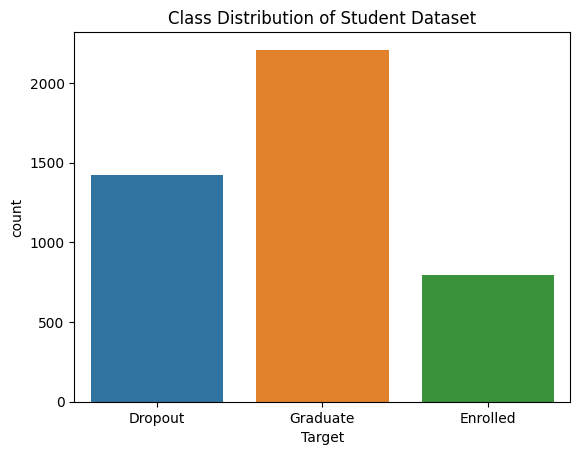

In [9]:
# display the distribution of the output variable (target) to spot number of classes 
sns.countplot(data=df,x="Target")
plt.title("Class Distribution of Student Dataset")
plt.show()

# ***Seems like we have class imbalance right!***

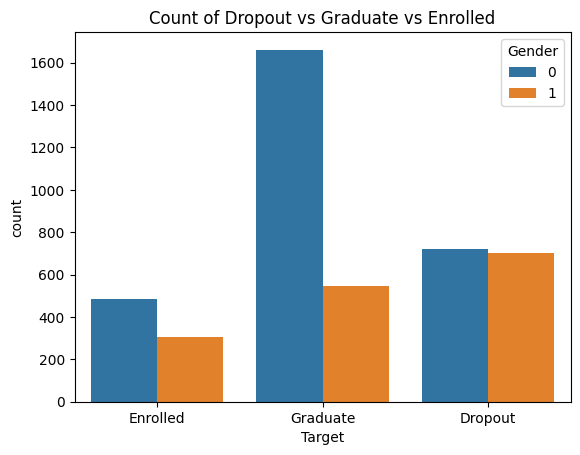

In [10]:
# do some explatoray data anlysis 
sns.countplot(data=df,x="Target",hue="Gender",order=["Enrolled","Graduate","Dropout"])
plt.title("Count of Dropout vs Graduate vs Enrolled")
plt.show()

# ***Splitting the class categories into different levels based on second var (Gender)***

In [11]:
# converting the class labels into numerical encoding 
from sklearn.preprocessing import LabelEncoder
# instantiate a label encoder object
lbe = LabelEncoder()
# fit the labels column 
lbe.fit(df["Target"])
# print out the number of classes found and their labels mapping!
print("Number of classes found:",len(lbe.classes_))
print("Classes and their corresponding labels:",lbe.classes_)
for i,label in enumerate(lbe.classes_):
    print(f"class {label} has index {i}")
# tranform the labels column
df["Target"] = lbe.transform(df["Target"])
#print some samples 5 rows 
print(df["Target"][:5])

Number of classes found: 3
Classes and their corresponding labels: ['Dropout' 'Enrolled' 'Graduate']
class Dropout has index 0
class Enrolled has index 1
class Graduate has index 2
0    0
1    2
2    0
3    2
4    2
Name: Target, dtype: int64


In [12]:
print(df["Target"].value_counts())

Target
2    2209
0    1421
1     794
Name: count, dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


<Axes: >

/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


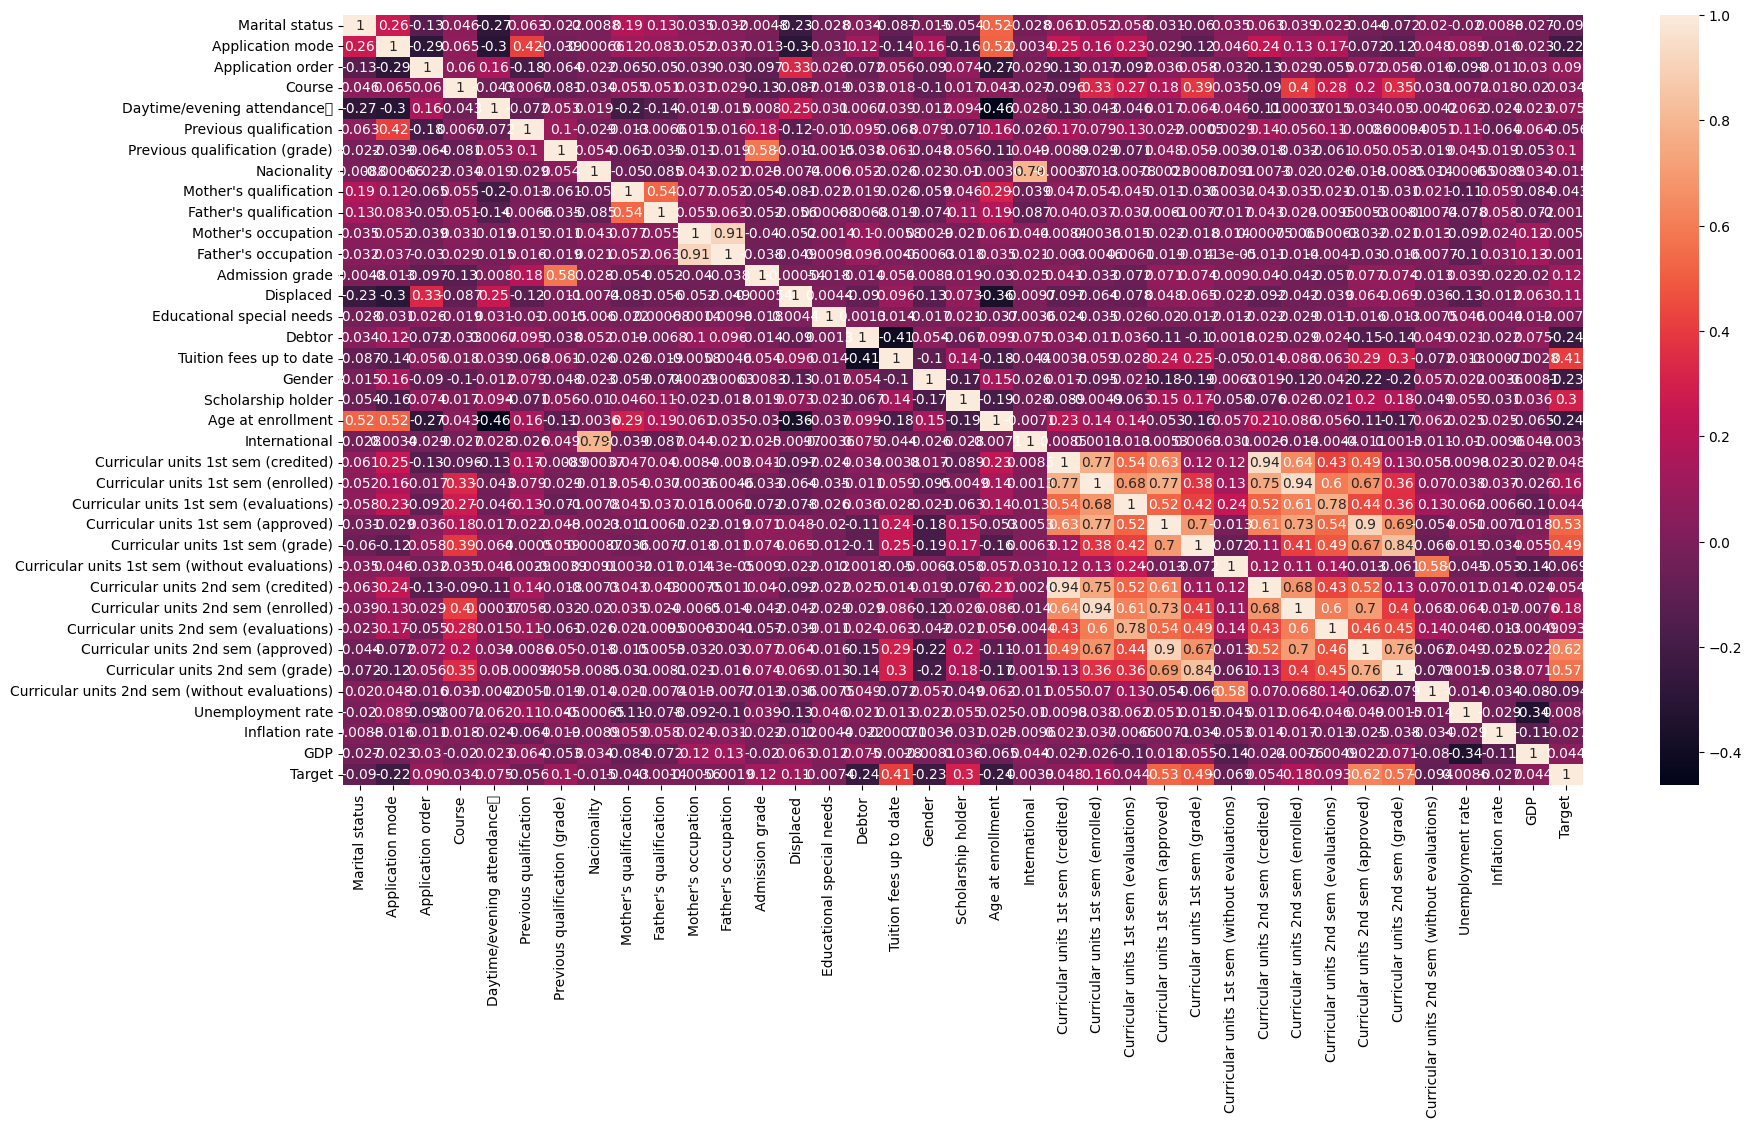

In [13]:
# now lets calculate the correlation matrix to study the relation between the variables 
corr_matrix = df.corr()
# lets visulaize the matrix using sns.heatmap
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix,annot=True)

In [14]:
features_names = np.array(df.columns[:-1])
features_corrs = np.array(corr_matrix)[:,-1][:-1]
print("number of features to deal with:",len(features_names))
print("number of features corrs to deal wth:",len(features_corrs))

number of features to deal with: 36
number of features corrs to deal wth: 36


In [15]:
for i in range(len(features_names)):
    print(f"feature {features_names[i]} has correlation with Target output =\n{np.array(corr_matrix)[:,-1][i]}")

feature Marital status has correlation with Target output =
-0.0898035315579437
feature Application mode has correlation with Target output =
-0.2217465810036503
feature Application order has correlation with Target output =
0.08979090533420346
feature Course has correlation with Target output =
0.03421882553719959
feature Daytime/evening attendance	 has correlation with Target output =
0.0751065008654975
feature Previous qualification has correlation with Target output =
-0.05603859160774978
feature Previous qualification (grade) has correlation with Target output =
0.1037636971638784
feature Nacionality has correlation with Target output =
-0.014801187243481246
feature Mother's qualification has correlation with Target output =
-0.0431777192811184
feature Father's qualification has correlation with Target output =
-0.0013926923340775138
feature Mother's occupation has correlation with Target output =
-0.005628564741253058
feature Father's occupation has correlation with Target output

In [16]:
# defining a function for extracting the features with certain correlation cofficient value
def analyze_features(threshold,features_names,features_corrs):
    bool_output = features_corrs>=threshold
    features_thresh = features_names[bool_output]
    corrs_thresh = features_corrs[bool_output]
    return features_thresh,corrs_thresh

# lets see features with corrs above 0.5
threshold = 0.5
f_t,c_t = analyze_features(threshold,features_names,features_corrs)
print(f"features names with correlation greater than or equal to {threshold}:\n",f_t)
print(f"features corrs with correlation greater than or euqal to {threshold}:\n",c_t)

features names with correlation greater than or equal to 0.5:
 ['Curricular units 1st sem (approved)'
 'Curricular units 2nd sem (approved)' 'Curricular units 2nd sem (grade)']
features corrs with correlation greater than or euqal to 0.5:
 [0.52912326 0.62415746 0.56682728]


/tmp/ipykernel_36/76664425.py:18: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()  # Adjust layout to prevent overlap
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


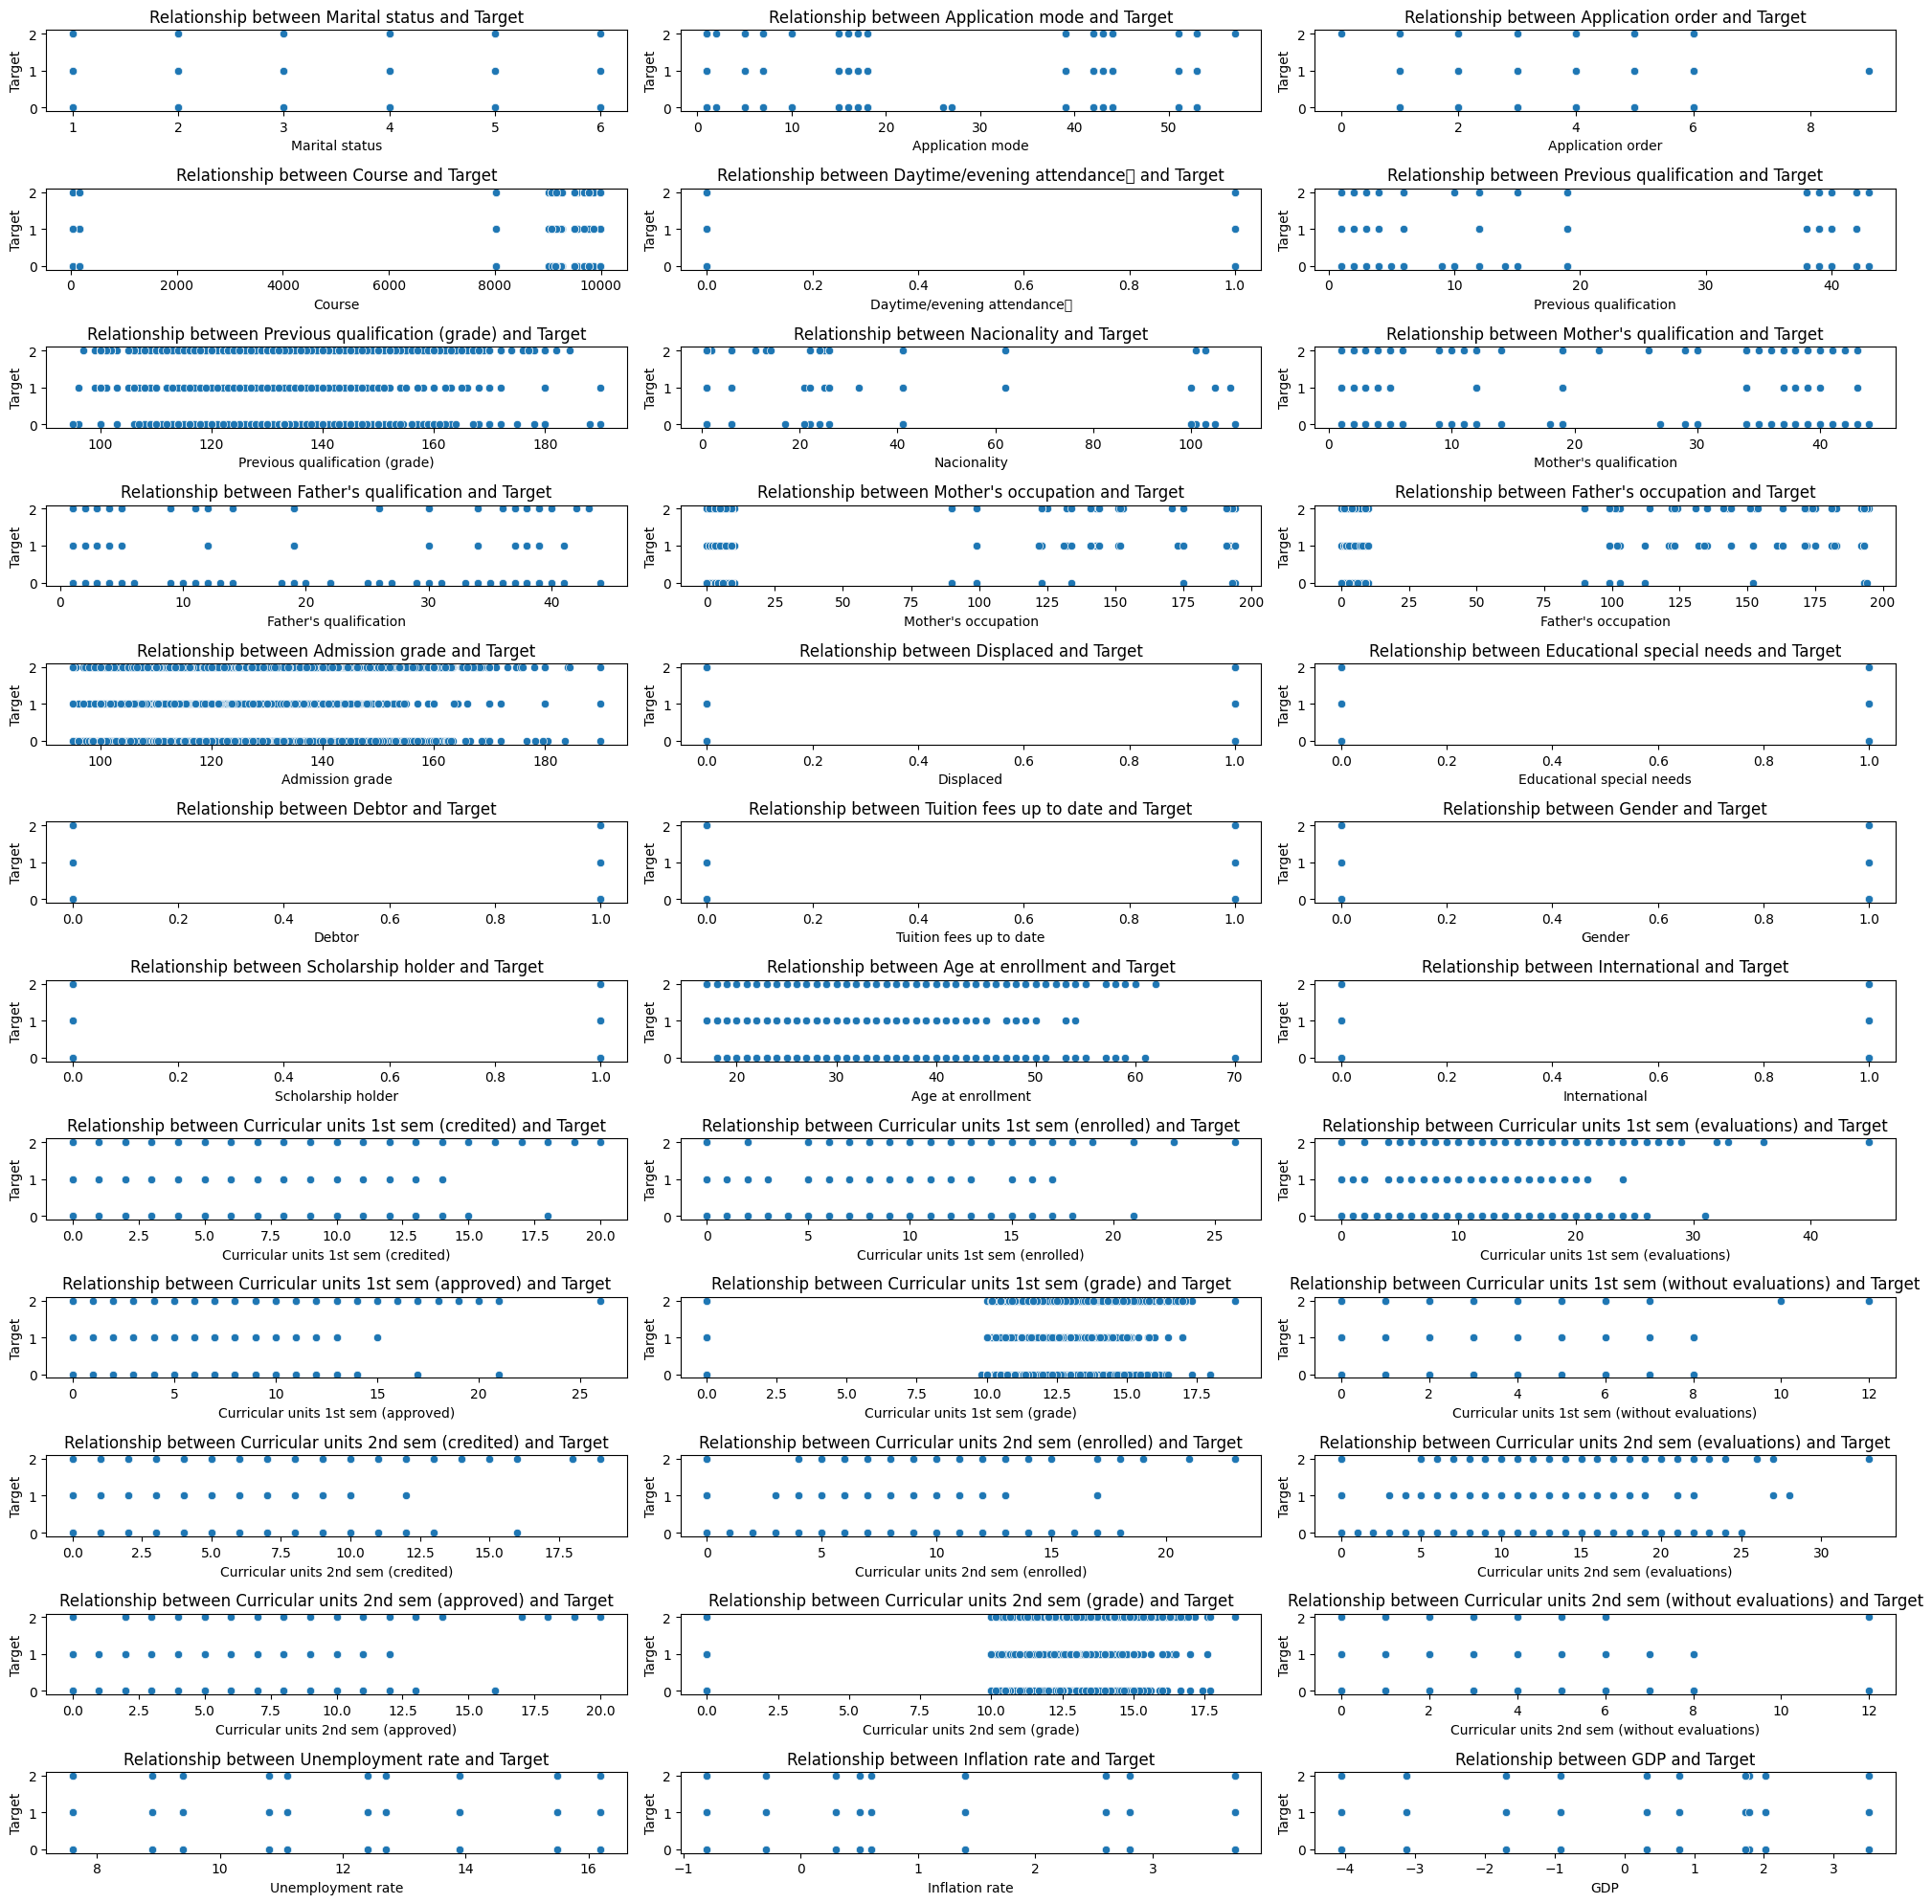

In [17]:
# Set the size of the plots
plt.figure(figsize=(20, 20))

# Get the feature names excluding the target variable
features = [col for col in df.columns if col != 'Target']

# Create a grid of plots
n_features = len(features)
n_cols = 3  # Number of columns in the grid
n_rows = (n_features + n_cols - 1) // n_cols  # Compute the number of rows needed

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)  # Create a subplot for each feature
    sns.scatterplot(data=df, x=feature, y='Target')
    plt.title(f'Relationship between {feature} and Target')
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.tight_layout()  # Adjust layout to prevent overlap

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


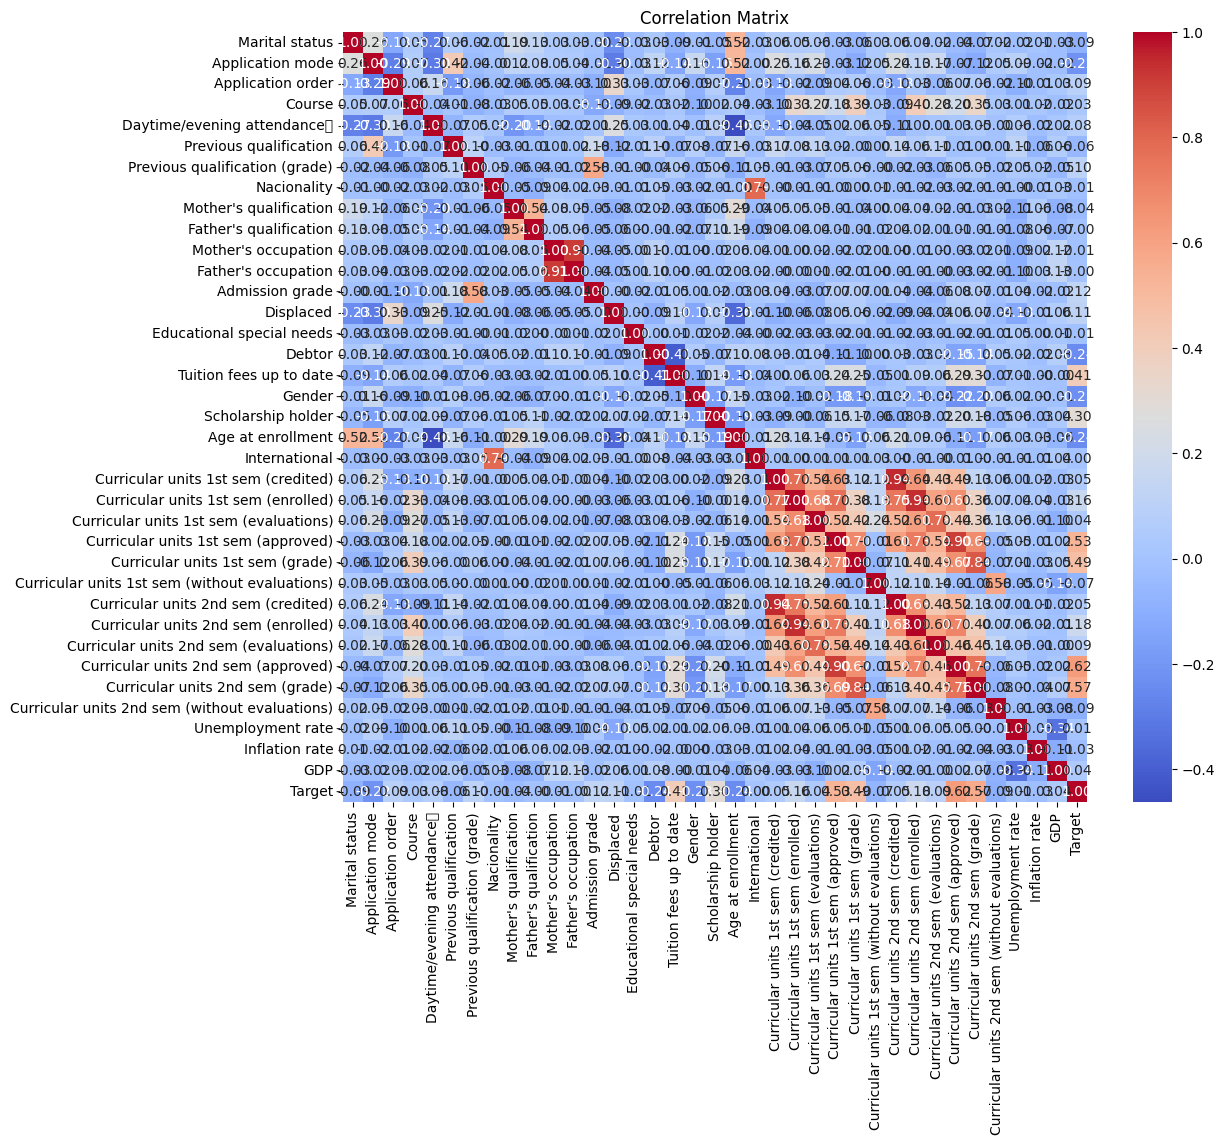

Target                                            1.000000
Curricular units 2nd sem (approved)               0.624157
Curricular units 2nd sem (grade)                  0.566827
Curricular units 1st sem (approved)               0.529123
Curricular units 1st sem (grade)                  0.485207
Tuition fees up to date                           0.409827
Scholarship holder                                0.297595
Curricular units 2nd sem (enrolled)               0.175847
Curricular units 1st sem (enrolled)               0.155974
Admission grade                                   0.120889
Displaced                                         0.113986
Previous qualification (grade)                    0.103764
Curricular units 2nd sem (evaluations)            0.092721
Application order                                 0.089791
Daytime/evening attendance\t                      0.075107
Curricular units 2nd sem (credited)               0.054004
Curricular units 1st sem (credited)               0.0481

In [18]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Get features with high correlation to the target
target_corr = corr_matrix['Target'].sort_values(ascending=False)
print(target_corr)
print(type(target_corr))

# ***Feature Selection using Univariate Feature Selection***

In [19]:
from sklearn.feature_selection import SelectKBest, f_classif

# split features and target variables 
X = df.drop(columns="Target")
y = df["Target"]

# Apply SelectKBest with ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=5)  # Use 'all' to get scores for all features
selector.fit(X, y)

# get featuress scores 
scores = selector.scores_
features = X.columns

# Display scores
for feature, score in zip(features, scores):
    print(f'Feature:{feature}, Score:{score}')
    print("#"*10)
    
# select the best five features out of 36 features 
X_new = selector.transform(X)

Feature:Marital status, Score:19.832254668921177
##########
Feature:Application mode, Score:114.53495629517889
##########
Feature:Application order, Score:19.727173545042834
##########
Feature:Course, Score:2.67098419548326
##########
Feature:Daytime/evening attendance	, Score:14.454123435665933
##########
Feature:Previous qualification, Score:7.004526317842808
##########
Feature:Previous qualification (grade), Score:27.728588718553507
##########
Feature:Nacionality, Score:0.8362361613541724
##########
Feature:Mother's qualification, Score:12.822711802617553
##########
Feature:Father's qualification, Score:3.838468967023663
##########
Feature:Mother's occupation, Score:9.838353227256286
##########
Feature:Father's occupation, Score:8.967607540050922
##########
Feature:Admission grade, Score:35.64860425748622
##########
Feature:Displaced, Score:29.23922620345411
##########
Feature:Educational special needs, Score:0.3208540674218296
##########
Feature:Debtor, Score:137.6475267450392
####

In [20]:
# checking the shape of X_new 
print("shape of X data matrix after selecting the best 5 features:",X_new.shape)
print("shape of y data labels after selecting the best 5 features:",y.shape)
print("Checking the type of data matrix:",type(X_new))
print("Checking the type of dala labels:",type(y))

shape of X data matrix after selecting the best 5 features: (4424, 5)
shape of y data labels after selecting the best 5 features: (4424,)
Checking the type of data matrix: <class 'numpy.ndarray'>
Checking the type of dala labels: <class 'pandas.core.series.Series'>


In [21]:
# converting the y from pandas series into numpy array for convenience!
y = np.array(y)

In [22]:
# ok displaying the best five features
# Create a DataFrame with features and their scores
features_scores = pd.DataFrame({'Feature': features, 'Score': scores})

# Sort the DataFrame by score in descending order
features_scores = features_scores.sort_values(by='Score', ascending=False)

# Select the top 5 or 10 features
top_n = 5  # Change this to 5 if you want the top 5 features
top_features = features_scores.head(top_n)

# Display the top features
print(f'Top {top_n} features:')
print(top_features)

Top 5 features:
                                Feature        Score
30  Curricular units 2nd sem (approved)  1410.732938
31     Curricular units 2nd sem (grade)  1134.109544
24  Curricular units 1st sem (approved)   859.866768
25     Curricular units 1st sem (grade)   713.517328
16              Tuition fees up to date   505.621429


# ***Feature Selection using Recursive Feature Ellimination***

In [23]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# initialize the model
log_reg = LogisticRegression()

# initilaize the rfe
selector = RFE(log_reg,n_features_to_select=5)
selector.fit(X,y)

# Get ranking of features
ranking = selector.ranking_
features = X.columns

# Display feature ranking
for feature, rank in zip(features, ranking):
    print(f'Feature: {feature}, Rank: {rank}')

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Feature: Marital status, Rank: 12
Feature: Application mode, Rank: 25
Feature: Application order, Rank: 14
Feature: Course, Rank: 30
Feature: Daytime/evening attendance	, Rank: 4
Feature: Previous qualification, Rank: 21
Feature: Previous qualification (grade), Rank: 29
Feature: Nacionality, Rank: 27
Feature: Mother's qualification, Rank: 22
Feature: Father's qualification, Rank: 26
Feature: Mother's occupation, Rank: 23
Feature: Father's occupation, Rank: 28
Feature: Admission grade, Rank: 24
Feature: Displaced, Rank: 11
Feature: Educational special needs, Rank: 31
Feature: Debtor, Rank: 1
Feature: Tuition fees up to date, Rank: 1
Feature: Gender, Rank: 5
Feature: Scholarship holder, Rank: 1
Feature: Age at enrollment, Rank: 17
Feature: International, Rank: 32
Feature: Curricular units 1st sem (credited), Rank: 10
Feature: Curricular units 1st sem (enrolled), Rank: 3
Feature: Curricular units 1st sem (evaluations), Rank: 18
Feature: Curricular units 1st sem (approved), Rank: 2
Feature

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [24]:
# ok displaying the best five features
# Create a DataFrame with features and their scores
features_scores_rfe = pd.DataFrame({'Feature': features, 'Ranking': ranking})

# Sort the DataFrame by score in descending order
features_scores_rfe = features_scores_rfe.sort_values(by='Ranking', ascending=True)

# Select the top 5 or 10 features
top_n = 5  # Change this to 5 if you want the top 5 features
top_features = features_scores_rfe.head(top_n)

# Display the top features
print(f'Top {top_n} features:')
print(top_features)

Top 5 features:
                                Feature  Ranking
30  Curricular units 2nd sem (approved)        1
28  Curricular units 2nd sem (enrolled)        1
18                   Scholarship holder        1
16              Tuition fees up to date        1
15                               Debtor        1


# ***Feature importance form Tree-based models***

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit the model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
features = X.columns

# Display feature importances
for feature, importance in zip(features, importances):
    print(f'Feature: {feature}, Importance: {importance}')

Feature: Marital status, Importance: 0.003599313000685724
Feature: Application mode, Importance: 0.02171177657297185
Feature: Application order, Importance: 0.014105108210353651
Feature: Course, Importance: 0.03244297166852544
Feature: Daytime/evening attendance	, Importance: 0.00289744566989344
Feature: Previous qualification, Importance: 0.006147626931560799
Feature: Previous qualification (grade), Importance: 0.03702022549109365
Feature: Nacionality, Importance: 0.0018871124708033735
Feature: Mother's qualification, Importance: 0.02150394158274988
Feature: Father's qualification, Importance: 0.02149882172382861
Feature: Mother's occupation, Importance: 0.025815795363991836
Feature: Father's occupation, Importance: 0.029201506478640976
Feature: Admission grade, Importance: 0.042965168513494224
Feature: Displaced, Importance: 0.007689474166162234
Feature: Educational special needs, Importance: 0.0011676435776206216
Feature: Debtor, Importance: 0.010650665338744867
Feature: Tuition fee

In [26]:
# ok displaying the best five features
# Create a DataFrame with features and their scores
features_scores_tree = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort the DataFrame by score in descending order
features_scores_tree = features_scores_tree.sort_values(by='Importance', ascending=False)

# Select the top 5 or 10 features
top_n = 5  # Change this to 5 if you want the top 5 features
top_features = features_scores_tree.head(top_n)

# Display the top features
print(f'Top {top_n} features:')
print(top_features)

Top 5 features:
                                Feature  Importance
30  Curricular units 2nd sem (approved)    0.158702
24  Curricular units 1st sem (approved)    0.102849
31     Curricular units 2nd sem (grade)    0.088524
25     Curricular units 1st sem (grade)    0.056551
16              Tuition fees up to date    0.043685


# ***kinda the same result we got from the correlation matrix! so good so far:)***

In [27]:
# normalize the data first 
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X_new_norm = minmax.fit_transform(X_new)
print(X_new_norm.shape)

(4424, 5)


In [28]:
# splitting the dataset into training and testing subsets 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new_norm,y,test_size=0.2,random_state=12,shuffle=True)
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (3539, 5)
X_test shape: (885, 5)
y_train shape: (3539,)
y_test shape: (885,)


# *working with three four different types of algorithms (ML)*

In [29]:
# starting with the one and only logistic regression 
print(X_train[:10])
print("#"*60)
print(y_train[:10])
print("#"*60)
print(X_test[:10])
print("#"*60)
print(y_test[:10])

[[1.         0.26923077 0.63443709 0.4        0.74038462]
 [1.         0.23076923 0.67108168 0.3        0.65512821]
 [1.         0.23076923 0.67108168 0.15       0.64615385]
 [1.         0.19230769 0.67549669 0.25       0.61923077]
 [1.         0.23076923 0.64459161 0.3        0.67307692]
 [0.         0.23076923 0.66225166 0.3        0.65512821]
 [0.         0.19230769 0.69933775 0.2        0.57884615]
 [1.         0.26923077 0.85464522 0.4        0.83581197]
 [1.         0.19230769 0.6781457  0.15       0.68205128]
 [1.         0.23076923 0.73415326 0.25       0.68923077]]
############################################################
[2 2 0 2 2 2 0 2 1 2]
############################################################
[[1.         0.15384615 0.63576159 0.25       0.72153846]
 [1.         0.26923077 0.79273415 0.35       0.80569231]
 [1.         0.03846154 0.52980132 0.         0.        ]
 [1.         0.15384615 0.58278146 0.2        0.59230769]
 [1.         0.30769231 0.65562914 0.25    

number of classes found by logistic regression: 3
the classes are: [0 1 2]
logistic regression training set score: 0.712913252331167
logistic regression tesing set score: 0.7152542372881356
Training dataset multi class accuracy: 0.712913252331167
Testing dataset multi class accuracy: 0.7152542372881356


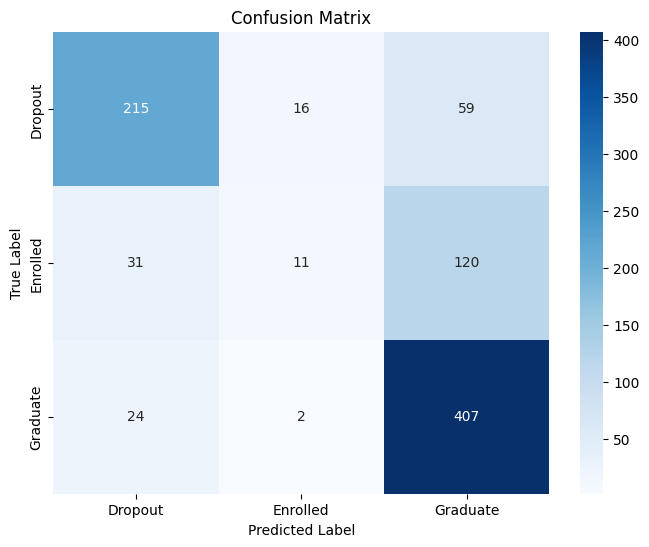

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       290
           1       0.38      0.07      0.12       162
           2       0.69      0.94      0.80       433

    accuracy                           0.72       885
   macro avg       0.62      0.58      0.56       885
weighted avg       0.67      0.72      0.66       885



In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# calling logistic regression model object
model_1 = LogisticRegression(multi_class="multinomial",solver="lbfgs",penalty="l2",C=0.8,max_iter=1000)


# fit the model on training data
model_1.fit(X_train,y_train)

# print out the number of classes found by the algorithm 
print("number of classes found by logistic regression:",len(model_1.classes_))
print("the classes are:",model_1.classes_)

# lets calculate the score on training and testing sets 
print("logistic regression training set score:",model_1.score(X_train,y_train))
print("logistic regression tesing set score:",model_1.score(X_test,y_test))

# lets predict the class probabilities out of 1 using softmax multinomial func
y_pred_train = model_1.predict(X_train)
y_pred_test = model_1.predict(X_test)

# calcualting the accuracy on each dataset
print("Training dataset multi class accuracy:",accuracy_score(y_train,y_pred_train))
print("Testing dataset multi class accuracy:",accuracy_score(y_test,y_pred_test))

# calculating the confusion matrix 
cm = confusion_matrix(y_test,y_pred_test)

# Define the class labels (optional)
class_labels = [lbe.classes_[0],lbe.classes_[1],lbe.classes_[2]]  # Replace with your class names

# Plot the heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Add labels and a title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Display the heatmap
plt.show()

# plot the classification report 
print(classification_report(y_test,y_pred_test))

# ***Trying KKK Classifier :)***

fitting the model on k =  1
predicting the test samples using trained KNN model
Evaluating the model's classification accuracy score
finished with KNN model {k} =  1
fitting the model on k =  3
predicting the test samples using trained KNN model
Evaluating the model's classification accuracy score
finished with KNN model {k} =  3
fitting the model on k =  5
predicting the test samples using trained KNN model
Evaluating the model's classification accuracy score
finished with KNN model {k} =  5
fitting the model on k =  7
predicting the test samples using trained KNN model
Evaluating the model's classification accuracy score
finished with KNN model {k} =  7
fitting the model on k =  9
predicting the test samples using trained KNN model
Evaluating the model's classification accuracy score
finished with KNN model {k} =  9
fitting the model on k =  11
predicting the test samples using trained KNN model
Evaluating the model's classification accuracy score
finished with KNN model {k} =  11
fi

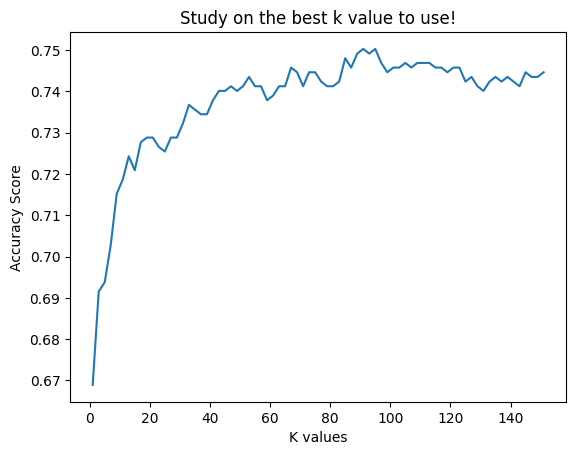

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# instantiate the KNN model
# lets do some hyperparameters fine tuning to see which value of k is the best one 
k_vs = np.array(range(1,152,2))
testing_accuracies = []
for i in range(len(k_vs)):
    model_i = KNeighborsClassifier(n_neighbors=k_vs[i])
    print("fitting the model on k = ",k_vs[i])
    model_i.fit(X_train,y_train)
    print("predicting the test samples using trained KNN model")
    y_pred = model_i.predict(X_test)
    print("Evaluating the model's classification accuracy score")
    acc_score = accuracy_score(y_test,y_pred)
    # append this value to the testing_accuracies list 
    testing_accuracies.append(acc_score)
    print("finished with KNN model {k} = ",k_vs[i])
plt.plot(k_vs,testing_accuracies)
plt.xlabel("K values")
plt.ylabel("Accuracy Score")
plt.title("Study on the best k value to use!")
plt.show()

# Seems like K = 95 or 93 would lead to better accuracy metric value

Training dataset multi class accuracy: 0.7479513987001978
Testing dataset multi class accuracy: 0.7491525423728813


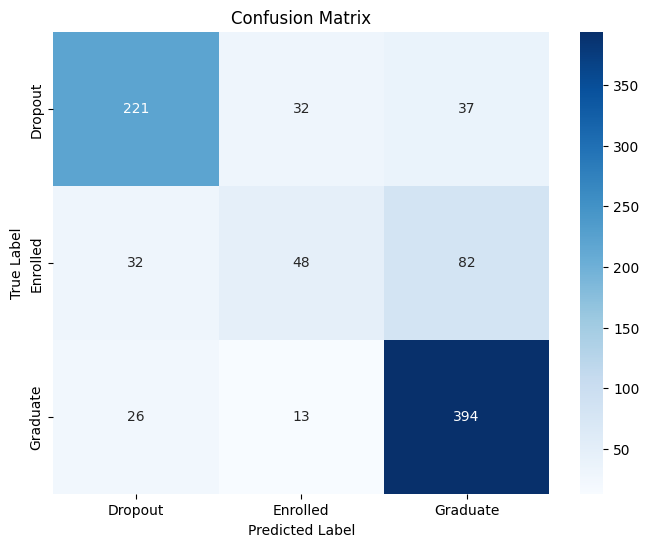

              precision    recall  f1-score   support

           0       0.79      0.76      0.78       290
           1       0.52      0.30      0.38       162
           2       0.77      0.91      0.83       433

    accuracy                           0.75       885
   macro avg       0.69      0.66      0.66       885
weighted avg       0.73      0.75      0.73       885



In [36]:
model_2 = KNeighborsClassifier(n_neighbors=93)

model_2.fit(X_train,y_train)

y_pred_train_knn = model_2.predict(X_train)
y_pred_test_knn = model_2.predict(X_test)

# calcualting the accuracy on each dataset
print("Training dataset multi class accuracy:",accuracy_score(y_train,y_pred_train_knn))
print("Testing dataset multi class accuracy:",accuracy_score(y_test,y_pred_test_knn))

# calculating the confusion matrix 
cm = confusion_matrix(y_test,y_pred_test_knn)

# Define the class labels (optional)
class_labels = [lbe.classes_[0],lbe.classes_[1],lbe.classes_[2]]  # Replace with your class names

# Plot the heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Add labels and a title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Display the heatmap
plt.show()

# plot the classification report 
print(classification_report(y_test,y_pred_test_knn))

# **Working with random forest classifier**

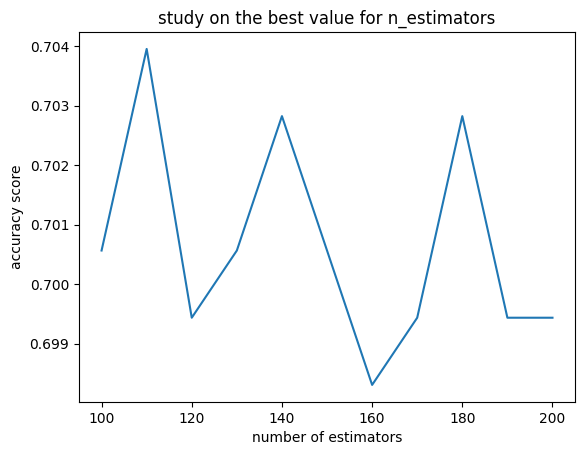

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

trees_numbers = np.arange(100,201,10)
accuracy_scores = []
for i in range(len(trees_numbers)):
    model_i = RandomForestClassifier(n_estimators=trees_numbers[i],n_jobs=-1)
    model_i.fit(X_train,y_train)
    y_pred = model_i.predict(X_test)
    acc_score = accuracy_score(y_test,y_pred)
    accuracy_scores.append(acc_score)
plt.plot(trees_numbers,accuracy_scores)
plt.xlabel("number of estimators")
plt.ylabel("accuracy score")
plt.title("study on the best value for n_estimators")
plt.show()

# **seems like n_estimators equal to 110 works fine!**

Training dataset multi class accuracy: 0.9519638315908449
Testing dataset multi class accuracy: 0.703954802259887


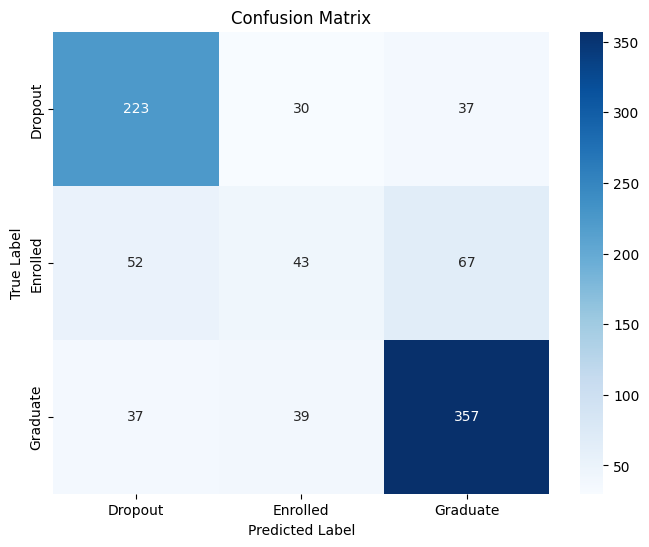

              precision    recall  f1-score   support

           0       0.71      0.77      0.74       290
           1       0.38      0.27      0.31       162
           2       0.77      0.82      0.80       433

    accuracy                           0.70       885
   macro avg       0.62      0.62      0.62       885
weighted avg       0.68      0.70      0.69       885



In [48]:
model_3 = RandomForestClassifier(n_estimators=110)

model_3.fit(X_train,y_train)

y_pred_train_rf = model_3.predict(X_train)
y_pred_test_rf = model_3.predict(X_test)

# calcualting the accuracy on each dataset
print("Training dataset multi class accuracy:",accuracy_score(y_train,y_pred_train_rf))
print("Testing dataset multi class accuracy:",accuracy_score(y_test,y_pred_test_rf))

# calculating the confusion matrix 
cm = confusion_matrix(y_test,y_pred_test_rf)

# Define the class labels (optional)
class_labels = [lbe.classes_[0],lbe.classes_[1],lbe.classes_[2]]  # Replace with your class names

# Plot the heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Add labels and a title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Display the heatmap
plt.show()

# plot the classification report 
print(classification_report(y_test,y_pred_test_rf))

# Lets add all the models performance metrics and create a table

In [55]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Classification Model","Training set Accuracy","Testing set Accuracy"]
models_names = ["Logistic Regression","K Nearest Neighbors","Random Forest"]
training_set_acc = [accuracy_score(y_train,y_pred_train),accuracy_score(y_train,y_pred_train_knn),accuracy_score(y_train,y_pred_train_rf)]
testing_set_acc = [accuracy_score(y_test,y_pred_test),accuracy_score(y_test,y_pred_test_knn),accuracy_score(y_test,y_pred_test_rf)]
for i in range(len(models_names)):
    table.add_row([models_names[i],training_set_acc[i],testing_set_acc[i]])
print(table)

+----------------------+-----------------------+----------------------+
| Classification Model | Training set Accuracy | Testing set Accuracy |
+----------------------+-----------------------+----------------------+
| Logistic Regression  |   0.712913252331167   |  0.7152542372881356  |
| K Nearest Neighbors  |   0.7479513987001978  |  0.7491525423728813  |
|    Random Forest     |   0.9519638315908449  |  0.703954802259887   |
+----------------------+-----------------------+----------------------+


# ***Ok as we notice here that we have a clear sign of overfitting using random forest, logistic regression is good but knn is the best out of all of them!***

# **KNN Wins!**

# End of the noteBook Bye for Now :)